In [1]:
# Importar os pacotes necessários
import pandas as pd
#from fuzzywuzzy import fuzz
#from itertools import combinations

pd.set_option('display.max_columns', 5)

# Conectar com Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/MyDrive/Colab/jai2021-jupyter-colab/3.Preparacao

!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab/jai2021-jupyter-colab/3.Preparacao
3.1.Importacao.Dados.ipynb  3.2.Limpeza.ipynb  datasets  img


# Preparação de Dados para Ciência

Em Ciência de Dados, dados de qualidade são pré-requisito para pesquisas válidas, descobertas significativas, modelos de Aprendizado de Máquina, entre outros. Porém, no mundo real, dados brutos costumam ser incompletos, ruidosos, inconsistentes e, às vezes, estão em formato inutilizável. Portanto, antes de alimentá-los a modelos (e outras etapas de pesquisa), é fundamental averiguar a integridade de dados e identificar possíveis problemas. Este processo é denominado pré-processamento de dados.

Essencialmente, preparar dados significa adequá-los para servirem de entrada nos processos da pesquisa. Existem muitas técnicas de pré-processamento que, geralmente, acontecem em etapas organizadas nas seguintes categorias: Limpeza de Dados, Integração de Dados, Transformação de Dados, e Redução de Dados. As etapas do préprocessamento não são mutuamente exclusivas e são altamente dependentes do conjunto de dados; ou seja, podem trabalhar em conjunto, mas não são obrigatórias.

Em particular, a Limpeza de dados pode remover ruído e corrigir inconsistências nos dados. A Integração de dados mescla dados de várias fontes em um armazenamento de dados coerente, como um armazém de dados. Transformações de dados, como normalização, podem melhorar a precisão e eficiência de algoritmos que envolvem medições de distância. Então, a Redução de dados pode diminuir o tamanho dos dados agregando ou eliminando recursos redundantes. Através de exemplos com dados reais, esta seção define e descreve cada uma dessas etapas técnicas

# Limpeza de Dados

A limpeza de dados é o processo de **detecção e correção de registros incorretos ou corrompidos** em um conjunto de dados. 

Após a identificação de registros incorretos ou corrompidos, podemos:

- substituir
- modificar 
- excluir partes incompletas, imprecisas ou irrelevantes. 

> 💡 Em geral, a limpeza de dados leva a uma **sequência de tarefas** que visam melhorar a qualidade dos dados. Algumas dessas tarefas incluem não só lidar com dados ausentes e duplicados, mas também remover dados ruidosos, inconsistentes e outliers. 

Para começar o processo de limpeza, primeiro vamos realizar a importação dos dados.

In [3]:
# Ler a tabela modificada
df = pd.read_csv('../dataset/spotify_artists_info_edited.csv', sep='\t', encoding='utf-8')
df.head(10)

,artist_id,name,...,genres,image_url
0,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,...,"['permanent wave', 'pop']",https://i.scdn.co/image/4ffd6710617d289699cc0d...
1,6Te49r3A6f5BiIgBRxH7FH,Ninho,...,"['french hip hop', 'pop urbaine']",https://i.scdn.co/image/ab67616d0000b2733f12b1...
2,4QrBoWLm2WNlPdbFhmlaUZ,KEVVO,...,"['perreo', 'reggaeton', 'reggaeton flow', 'tra...",https://i.scdn.co/image/9a75b11e5080f576bdff76...
3,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,...,"['alt z', 'pop', 'post-teen pop']",https://i.scdn.co/image/5fb1f691c5d3cdbc54e193...
4,6KImCVD70vtIoJWnq6nGn3,Harry Styles,...,"['pop', 'post-teen pop']",https://i.scdn.co/image/b2163e7456f3d618a0e2a4...
5,6TOKWuw816UU34AE4MCZqr,Beltito,...,NaN,NaN
6,7F2utINZ6tSokSiZTQBE27,Guè Pequeno,...,"['italian hip hop', 'italian pop']",https://i.scdn.co/image/8c0ddb6022be1bbb4795cb...
7,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,...,"['emo rap', 'lgbtq+ hip hop']",https://i.scdn.co/image/06404029eb0ce3b6f3b9bc...
8,7b79bQFziJFedJb75k6hFt,Tion Wayne,...,"['london rap', 'uk hip hop']",https://i.scdn.co/image/cd5bce94c304c5cd608eda...
9,2UZIAOlrnyZmyzt1nuXr9y,Nicki Nicole,...,"['argentine hip hop', 'r&b argentino', 'trap a...",https://i.scdn.co/image/a5f4ce02d179a6f41fc430...


## Dados ausentes 

Representam um obstáculo para a criação da maioria dos modelos de Aprendizado de Máquina e outras análises. Portanto, é necessário identificar **campos para os quais não há dados** e, em seguida, compensá-los adequadamente. 

Dados ausentes podem ocorrer quando nenhuma informação é fornecida para um ou mais registros (ou atributos inteiros) da base de dados. Em um _**Pandas DataFrame**_, os dados ausentes são representados como **`None`** ou **`NaN`** (_Not a Number_).

> ⚠️ **`NaN`** é o marcador de valor ausente **padrão** por razões de velocidade e conveniência computacional. 

Após importar pacotes necessários e carregar o conjunto de dados, inicia-se o processo de limpeza de dados. Para facilitar a detecção, o __Pandas__ fornece a função **`isna()`** para identificar valores ausentes em um _DataFrame_.

A função retorna uma **matriz booleana** indicando se cada elemento correspondente está faltando **(`True`) ou não (`False`)**. O exemplo a seguir apresenta o uso desta função no *DataFrame* `df` e exibe seu resultado.

In [4]:
# Esta célula identifica valores ausentes no Dataframe
df.isna()

,artist_id,name,...,genres,image_url
0,False,False,...,False,False
1,False,False,...,False,False
2,False,False,...,False,False
3,False,False,...,False,False
4,False,False,...,False,False
...,...,...,...,...,...
620,False,False,...,False,False
621,False,False,...,False,False
622,False,False,...,False,False
623,False,False,...,False,False


De acordo com o resultado da célula anterior, o conjunto de dados está **aparentemente** completo. 

> ⚠️ Porém, isso não é suficiente para descartar a hipótese de que **existem dados ausentes.**

Para uma melhor averiguação, pode-se resumir cada coluna no _DataFrame booleano_ somando os valores **False = 0**  e **True = 1** . Tal processo retorna o número de valores ausentes no _DataFrame_. 

Também pode-se dividir cada valor pelo número total de linhas, resultando na **porcentagem de tais ausências**, conforme o exemplo a seguir.

In [5]:
# Calcular o total e a porcentagem de valores ausentes

## retorna o total de valores ausentes de cada coluna
num_ausentes = df.isna().sum() 

## retorna a porcentagem de valores ausentes de cada coluna
porc_ausentes = df.isna().sum() * 100 / len(df)

# Cria um DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
    'Coluna': df.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
artist_id,artist_id,0,0.00
name,name,0,0.00
followers,followers,0,0.00
popularity,popularity,62,9.92
genres,genres,40,6.40
image_url,image_url,10,1.60


O _DataFrame_ resultante contém os seguintes dados **ausentes**:
- **62** popularidades
- **40** listas de gêneros e 
- **10** url de imagens

O que resulta em 9,9%, 6,4% e 1,6% as porcentagens de registros ausentes de cada coluna, respectivamente. 

Após essa identificação, é necessário **tratar esses dados**. 

> 💡 A abordagem mais simples é **eliminar todos os registros que contenham valores ausentes**. 
No _Pandas_, o método **dropna()** permite analisar e descartar linhas/colunas com valores nulos. 

O parâmetro **axis** determina a dimensão em que a função atuará: 
- **axis = 0** remove todas as _linhas_ que contêm valores nulos
- **axis = 1** remove as _colunas_ que contêm valores nulos

#### Eliminando as linhas onde pelo menos um elemento está faltando

In [6]:
novo_df = df.dropna(axis=0) # retorna para um novo dataframe, sem as linhas que contém nulos

print(f"""\
Nº de linhas do DF original: {len(df)}
Nº de linhas do DF novo: {len(novo_df)}
Nº de linhas com pelo menos 1 valor ausente: {
(len(df) - len(novo_df))}""")

Nº de linhas do DF original: 625
Nº de linhas do DF novo: 529
Nº de linhas com pelo menos 1 valor ausente: 96


#### Eliminando as colunas onde pelo menos um elemento está faltando

In [7]:
novo_df = df.dropna(axis=1) # retorna para um novo dataframe, sem as colunas que contém nulos

print(f"""\
Nº de colunas do DF original: {len(df.columns)}
Nº de colunas do DF novo: {len(novo_df.columns)}
Nº de colunas com pelo menos 1 valor ausente: {
(len(df.columns) - len(novo_df.columns))}""")

Nº de colunas do DF original: 6
Nº de colunas do DF novo: 3
Nº de colunas com pelo menos 1 valor ausente: 3


### ⚠️ ATENÇÃO!⚠️

O código dos exemplos anteriores **removeram as linhas/colunas onde pelo menos um elemento está faltando**. 

Ambas abordagens são particularmente vantajosas para amostras de **grande volume de dados**, onde os valores podem ser descartados sem distorcer significativamente a interpretação. Em geral, a estratégia de exclusão é utilizada quando o problema de falta de dados ocorre na **maioria** das linhas ou colunas do conjunto de dados. Por exemplo, se mais de 75% das linhas correspondentes a um atributo (coluna) são ausentes, é melhor remover tal atributo.

> 💡  Vale lembrar que esse valor de 75% de dados ausentes **não é uma regra**, e não há uma receita de bolo: tudo vai depender dos seus dados e dos seus objetivos.

> ⚠️ No entanto, apesar de ser uma solução simples, ela **apresenta o risco de perder dados potencialmente úteis**.

### Solução Alternativa - Imputar Dados 🎲🎲

Uma alternativa mais confiável para lidar com dados ausentes é a **imputação**. Em vez de descartar tais dados, a imputação procura **substituir seus valores por outros**. Nessa abordagem, os valores ausentes são inferidos a partir dos dados existentes. 

> 💡 Existem várias maneiras de imputar os dados, sendo a imputação por valor constante ou por estatísticas básicas **(média, mediana ou moda)** as mais simples.

No exemplos a seguir, os valores de colunas ausentes serão substituídos utilizando a função `fillna()`. Mas antes, vamos criar uma cópia do _DataFrame_ original para trabalharmos com ele.

In [8]:
# Criando uma cópia do DataFrame original
copia_df = df.copy()

#### Imputando dados na coluna _`image_url`_

Substituindo todos os dados ausentes da coluna **'image_url'** por um valor estático 

Por exemplo, podemos inserir a url de imagem _default_ em todas as linhas em que este campo encontra-se nulo.

![Imagem](https://drive.google.com/uc?export=view&id=1vwRsdb3YAN9xCilddwP-4k05whjAkSvU)

In [9]:
copia_df["image_url"].fillna('https://icon-library.com/icon/default-user-icon-1.html', inplace=True)
copia_df.head()

,artist_id,name,...,genres,image_url
0,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,...,"['permanent wave', 'pop']",https://i.scdn.co/image/4ffd6710617d289699cc0d...
1,6Te49r3A6f5BiIgBRxH7FH,Ninho,...,"['french hip hop', 'pop urbaine']",https://i.scdn.co/image/ab67616d0000b2733f12b1...
2,4QrBoWLm2WNlPdbFhmlaUZ,KEVVO,...,"['perreo', 'reggaeton', 'reggaeton flow', 'tra...",https://i.scdn.co/image/9a75b11e5080f576bdff76...
3,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,...,"['alt z', 'pop', 'post-teen pop']",https://i.scdn.co/image/5fb1f691c5d3cdbc54e193...
4,6KImCVD70vtIoJWnq6nGn3,Harry Styles,...,"['pop', 'post-teen pop']",https://i.scdn.co/image/b2163e7456f3d618a0e2a4...


#### Imputando dados na coluna _`popularity`_

Neste caso, como esta é uma coluna numérica, podemos substituir todos os dados ausentes da coluna _popularity_ pela **média dos valores presentes na coluna**

In [10]:
# Substitui NaNs pela média de valores presentes
copia_df['popularity'].fillna(copia_df['popularity'].mean(), inplace=True)

> 💡 OBS: Quando **inplace='True'** é passado, os dados são alterados no próprio dataframe (não retorna nada)

In [11]:
# Coluna Popularity do Dataframe Original
df['popularity']

0      90.0
1      84.0
2      75.0
3      89.0
4      91.0
       ... 
620    87.0
621    73.0
622    71.0
623     NaN
624    74.0
Name: popularity, Length: 625, dtype: float64

In [12]:
# Coluna Popularity do Dataframe após a Imputação da média da popularidade em campos NaN
copia_df['popularity']

0      90.000000
1      84.000000
2      75.000000
3      89.000000
4      91.000000
         ...    
620    87.000000
621    73.000000
622    71.000000
623    77.513321
624    74.000000
Name: popularity, Length: 625, dtype: float64

#### Imputando dados na coluna _`genres`_

Neste caso, como não seria viável analisar cada artista separadamente para tentar inferir seu gênero musical, uma opção é substituir os valores ausentes por _**unknown**_.


In [13]:
# Substituir NaNs por 'unknown'
copia_df['genres'].fillna('unknown', inplace=True)

# Coluna Genres após imputação
copia_df['genres'].head(10)

0                            ['permanent wave', 'pop']
1                    ['french hip hop', 'pop urbaine']
2    ['perreo', 'reggaeton', 'reggaeton flow', 'tra...
3                    ['alt z', 'pop', 'post-teen pop']
4                             ['pop', 'post-teen pop']
5                                              unknown
6                   ['italian hip hop', 'italian pop']
7                        ['emo rap', 'lgbtq+ hip hop']
8                         ['london rap', 'uk hip hop']
9    ['argentine hip hop', 'r&b argentino', 'trap a...
Name: genres, dtype: object

> 💡 Para saber quais os índices que contém o valor 'unknown':
<br>
``
np.where(copia_df['genres']=='unknown')
``

### Verificando se todos os valores 'NaN' foram devidamente preenchidos

In [14]:
# Calcula o total e a % de valores ausentes
num_ausentes = copia_df.isna().sum() 
porc_ausentes = copia_df.isna().sum() * 100 / len(copia_df)

# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
    'Coluna': copia_df.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
artist_id,artist_id,0,0.0
name,name,0,0.0
followers,followers,0,0.0
popularity,popularity,0,0.0
genres,genres,0,0.0
image_url,image_url,0,0.0


Também existem várias técnicas de imputação avançadas cuja escolha depende da utilização dos dados, por exemplo, depende de **um modelo de aprendizado de máquina** para inserir e avaliar com precisão os dados ausentes. A imputação múltipla e modelos preditivos podem ser mais precisos, e assim são mais comuns do que métodos mais simples. 

> 💡 **não existe uma maneira ideal de compensar os valores ausentes**, pois cada estratégia pode ter um desempenho melhor ou pior dependendo do conjunto de dado e dos tipos de dados ausentes.

## Dados ruidosos 🎲📢

São dados que fornecem informações adicionais porém **sem sentido**, chamadas de ruído. Geralmente são gerados por alguma falha na coleta de dados, erros de entrada de dados, entre outros. Dados com ruído podem prejudicar resultados de análises e de modelos, como os de aprendizado de máquina, por exemplo. 

> 💡 Algumas soluções para tal problema incluem diferentes abordagens: tais como o método de **Binning**, **Regressão** e e algoritmos de agrupamento de dados (**Clustering**). 

Aqui, o foco é o método de **Binning**, uma técnica de **suavização de dados** para reduzir os efeitos de pequenos erros de observação. 

Os dados originais são divididos em segmentos de tamanhos iguais (_**bins**_) e, em seguida, são substituídos por um valor geral calculado para cada intervalo. Cada segmento é tratado separadamente, onde a substituição de valores pode ser realizada através de valores médios ou limites. 

> ⚠️ No _Pandas_, o método Binning usa as funções `cut()` e `qcut()`, que parecem iguais mas possuem diferenças.

### `qcut`

De acordo com a documentação, `qcut()` é uma **função de discretização baseada em quantis**: ela procura dividir os dados em _bins_ usando percentis com base na distribuição da amostra. 

A maneira mais simples de usá-la é **definir o número de quantis** e deixar que o _Pandas_ descubra como dividir os dados. 

O exemplo a seguir discretiza a variável **_followers_** de duas maneiras diferentes: 
- criando cinco _bins_ de mesmo tamanho
- configurando três quantis rotulados como "alto", "médio" e "baixo"

In [15]:
# Discretiza a variável 'followers' em 5 intervalos de tamanhos iguais
df['qcut_1'] = pd.qcut(df['followers'], q=5)

In [16]:
# Discretiza a variável 'followers' setamos três quantis rotulados como 'alto', 'médio' e 'baixo'
df['qcut_2'] = pd.qcut(df['followers'],  q=[0, .3, .7, 1], labels=["baixo", "médio", "alto"])

In [17]:
# Exibir o resultado das divisões
df.head()

,artist_id,name,...,qcut_1,qcut_2
0,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,...,"(6020134.2, 77681514.0]",alto
1,6Te49r3A6f5BiIgBRxH7FH,Ninho,...,"(2373906.0, 6020134.2]",alto
2,4QrBoWLm2WNlPdbFhmlaUZ,KEVVO,...,"(134539.2, 790144.4]",baixo
3,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,...,"(790144.4, 2373906.0]",médio
4,6KImCVD70vtIoJWnq6nGn3,Harry Styles,...,"(6020134.2, 77681514.0]",alto


### `cut`

Pode-se utilizar a função `cut()` para segmentar e ordenar os dados em _bins_. Enquanto `qcut()` calcula o tamanho de cada _bin_, garantindo que a distribuição dos dados nos compartimentos seja igual, a função `cut()` **define bordas exatas dos compartimentos**. 

> ⚠️ Neste caso não há garantia sobre a distribuição de itens em cada _bin_. 

O exemplo a seguir corta os dados da variável _**followers**_ em quatro bins de tamanhos iguais.

In [18]:
# Discretiza a variável 'followers' em 4 bins
df['cut_1'] = pd.cut(df['followers'], bins=4)
df.head()

,artist_id,name,...,qcut_2,cut_1
0,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,...,alto,"(19420416.75, 38840782.5]"
1,6Te49r3A6f5BiIgBRxH7FH,Ninho,...,alto,"(-77630.463, 19420416.75]"
2,4QrBoWLm2WNlPdbFhmlaUZ,KEVVO,...,baixo,"(-77630.463, 19420416.75]"
3,1McMsnEElThX1knmY4oliG,Olivia Rodrigo,...,médio,"(-77630.463, 19420416.75]"
4,6KImCVD70vtIoJWnq6nGn3,Harry Styles,...,alto,"(-77630.463, 19420416.75]"


Conforme mostrado a seguir, se você deseja uma distribuição igual dos valores em cada compartimento, use `qcut()`.

In [19]:
df['qcut_1'].value_counts()

(50.999, 134539.2]         125
(134539.2, 790144.4]       125
(790144.4, 2373906.0]      125
(2373906.0, 6020134.2]     125
(6020134.2, 77681514.0]    125
Name: qcut_1, dtype: int64

Caso contrário, se você quiser definir seus próprios intervalos numéricos de categorias, use a função `cut()`.

In [20]:
df['cut_1'].value_counts()

(-77630.463, 19420416.75]    590
(19420416.75, 38840782.5]     28
(38840782.5, 58261148.25]      5
(58261148.25, 77681514.0]      2
Name: cut_1, dtype: int64

## Outliers

São amostras de dados que são **claramente diferentes da tendência central**. Geralmente são criados por erros de coleta ou entrada de dados, e podem facilmente **produzir valores discrepantes** interferindo na qualidade de análises. 

> 💡 A maneira mais simples de identificar outliers é **observar os valores máximos e mínimos** em cada variável para ver se eles estão muito fora da curva normal. 


O exemplo a seguir utiliza a função `describe()` para gerar estatísticas descritivas do conjunto de dados, incluindo os valores máximos e mínimos. 

In [21]:
pd.set_option('display.max_columns', 10)

# Gera estatísticas descritivas das variáveis numéricas
df.describe().round().transpose() 

,count,mean,std,min,25%,50%,75%,max
followers,625.0,4471046.0,8194928.0,51.0,222726.0,1256547.0,4809711.0,77681514.0
popularity,563.0,78.0,10.0,0.0,72.0,79.0,84.0,100.0


> 💡 Para arredondar valores, use a função `.round()`
<br>
Para exibir a matriz transposta: `.transpose()`

Para a coluna _followers_, o valor máximo é 77.7 milhões de seguidores, enquanto o quartil de 75% é apenas 48 milhões. Portanto, artistas com mais de 77 milhões de seguidores **podem ser outliers**. 

Essa verificação geral é melhor realizada através da representação gráfica dos dados numéricos por meio de seus quartis. Para isso, pode-se utilizar **box plots**, onde os valores discrepantes são plotados como pontos individuais. 

> 💡 Este tipo de visualização será melhor abordado mais adiante!

O gráfico do exemplo a seguir mostra a distribuição da variável **_followers_**.

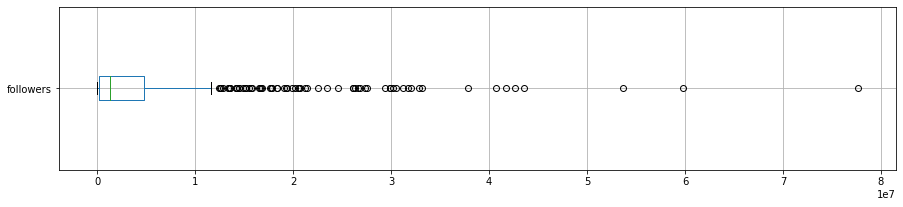

In [22]:
# Plota um boxplot da coluna 'followers'
df.boxplot(column=['followers'], figsize=(15, 3), vert=False)

O exemplo ilustra que existem inúmeros pontos individuais (outliers) entre aproximadamente **12** a **78 milhões** (observe que o eixo x está em dezenas de milhões). 

Embora tenha sido fácil detectar tais valores discrepantes, é preciso determinar as soluções adequadas para tratá-los. Assim como no caso de dados ausentes, o tratamento de outliers **depende muito do conjunto de dados e do objetivo do projeto**. Soluções possíveis incluem:

- manter
- ajustar 
- ou apenas remover os dados discrepantes

Uma técnica comum para a remoção de outliers é o método de **Z-score**, que considera como outliers e remove valores a uma determinada quantidade de desvios padrões da média. A quantidade desses desvios pode variar conforme o tamanho da amostra.

No exemplo a seguir, para identificar e remover os outliers da coluna **_followers_**, usou-se os z-scores de seus registros com a quantidade de desvios configurada para três. Para a obtenção dos z-scores, foi usado o módulo `stats` da biblioteca `SciPy`.

In [23]:
# Importa os pacotes necessários
import numpy as np
from scipy import stats

# Calcula os z-scores dos valores da coluna 'followers'
z_scores = stats.zscore(df['followers'])

# Converte cada elemento em z_scores em seu valor absoluto
# função `abs` de Numpy
abs_z_scores = np.abs(z_scores)

# Filtra o DataFrame original com uma quantidade de desvios padrões < 3
novo_df = df[abs_z_scores < 3]

print(f'{(len(df) - len(novo_df))} foram outliers removidos')

18 foram outliers removidos


## Dados duplicados

Aparecem em muitos contextos, especialmente durante a entrada ou coleta de dados. Por exemplo, ao usar um _web scraper_, a mesma página web pode ser coletada mais de uma vez, ou as mesmas informações podem estar em páginas diferentes. 

> ⚠️ Independente da causa, a duplicação de dados **pode levar a conclusões incorretas**, onde algumas observações podem ser consideradas mais comuns do que realmente são. 

O exemplo a seguir mostra quantas linhas estão duplicadas em cada coluna do conjunto de dados.

In [24]:
# Calcula o total de linhas duplicadas em cada coluna do nosso DataFrame
# Para cada coluna,
for coluna in df.columns:
    # Seleciona linhas duplicadas e as insire em um novo Dataframe
    duplicatas_df = df[df.duplicated(coluna)]
    
    # Imprime o tamanho do novo DataFrame (i.e., o número de linhas duplicadas)
    print(f"Total de linhas duplicadas "
          f"na {coluna}: {len(duplicatas_df)}")

Total de linhas duplicadas na artist_id: 0
Total de linhas duplicadas na name: 1
Total de linhas duplicadas na followers: 0
Total de linhas duplicadas na popularity: 569
Total de linhas duplicadas na genres: 136
Total de linhas duplicadas na image_url: 10
Total de linhas duplicadas na qcut_1: 620
Total de linhas duplicadas na qcut_2: 622
Total de linhas duplicadas na cut_1: 621


Note que apenas duas colunas do _DataFrame_ não possuem duplicatas: **artist_id** e **followers**. 

Além disso, observem que há **duas cópias do nome de um mesmo artista**. Essa duplicidade de dados é a categoria mais simples de duplicatas: são cópias exatamente iguais de um mesmo registro. Para resolver, basta identificar os valores idênticos e removê-los. 

O _Pandas_ fornece o método **`drop_duplicates()`** que retorna um novo _DataFrame_ com linhas duplicadas removidas, como no exemplo a seguir.

In [25]:
# Retorna um novo DataFrame com linhas duplicadas removidas
novo_df = df.drop_duplicates()

# Calcula o total de linhas duplicadas do novo DataFrame
duplicatas_df = novo_df[novo_df.duplicated()]
print(f"Total de linhas duplicadas: {len(duplicatas_df)}")

Total de linhas duplicadas: 0


Com apenas uma lista de registros com duplicatas, a melhor e mais simples solução é geralmente a remoção. Porém, com dados tabulares, a melhor solução é remover os dados duplicados com base em um **conjunto de identificadores exclusivos**. 

Por exemplo, existe a coluna de identificadores únicos dos artistas (**_`artist_id`_**), que facilita analisar se o nome duplicado identificado pode ser descartado, conforme o seguinte.

In [26]:
pd.set_option('display.max_columns', 5)
# Extrai o nome duplicado
nome_duplicado = df[df.duplicated(['name'])].name

# Localiza as linhas onde 'name' é igual ao nome duplicado
df.loc[df['name'].isin(nome_duplicado)]

,artist_id,name,...,qcut_2,cut_1
88,30vzHJVtI7JWEKqk40eOdz,Niack,...,baixo,"(-77630.463, 19420416.75]"
249,5uYe4bcAXlMP7d4mrOYkML,Niack,...,baixo,"(-77630.463, 19420416.75]"


Os resultados mostram dois artistas com o nome **Niack**, mas com identificadores únicos `diferentes`. 

> ⚠️ Neste caso, não se pode descartar uma das supostas cópias. 

Existem ainda outras formas de duplicação de dados mais complexas, onde mais de um registro é associado à mesma observação, porém seus valores não são completamente idênticos. Por exemplo, nomes próprios com e sem abreviação ou omissão de algum dos sobrenomes. Essa duplicação parcial é **bem mais difícil de identificar**, pois requer entender se realmente os registros duplicados dizem respeito ao mesmo objeto. 

Nesses casos, uma solução comum é utilizar **funções de similaridade de strings.** 

Uma ferramenta poderosa para esse problema é a biblioteca Python _`FuzzyWuzzy`_, que usa a distância de Levenshtein para calcular as diferenças entre duas strings. 

No exemplo a seguir, nós utilizamos duas funções, `ratio()` e `partial_ratio()`, para encontrar cópias não idênticas de nomes de artistas. O código retorna dois prováveis casos de duplicação parcial.

**No primeiro**, ao pesquisarmos a fundo, descobrimos que os dois nomes identificam duas artistas distintas. Portanto, não podemos remover essas supostas cópias. 

No entanto, **no segundo caso**, "Red Velvet" denomina o mesmo grupo feminino sul-coreano, porém o nome "Red Velvet - Irene & Seulgi" foi cadastrado na plataforma Spotify para representar a primeira subunidade do grupo (composto por Irene e Seulgi).

In [28]:
# Importa os pacotes necessários
from fuzzywuzzy import fuzz
from itertools import combinations

# Gera todas as combinações possíveis de dois elementos (nomes) da coluna 'name'
combinacoes = combinations(df.name, 2)

# Para cada tupla de nomes presente na lista de combinações,
for nome_1, nome_2 in list(combinacoes):
    
    # Calcula a similaridade parcial dos dois nomes
    partial_ratio = fuzz.partial_ratio(nome_1, nome_2)
    
    # Calcula a similaridade simples dos dois nomes
    ratio = fuzz.ratio(nome_1, nome_2)
    
    # Se os nomes forem parcialmente iguais, porém não identicos,
    if partial_ratio == 100 and ratio < 100 and ratio > 50:
        
        # Imprime os dois nomes e a pontuação das similaridades computadas
        print(nome_1, ' | ', nome_2)
        print(partial_ratio, ' | ', ratio)

ModuleNotFoundError: ignored

## ⚠️  ERRO de Biblioteca ⚠️ 

Se o seguinte erro ocorrer, é devido à falta da biblioteca utilizada em seu ambiente python.

![Erro de Lib](https://drive.google.com/uc?export=view&id=18YvLMnuE8q-N-JS5-TUEWxCUkUt-Fc4R)

Para resolver, podemos utilizar o comando de importação como no exemplo seguinte:

In [29]:
# Instala a biblioteca
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# Desinstala a biblioteca
!pip uninstall fuzzywuzzy

Found existing installation: fuzzywuzzy 0.18.0
Uninstalling fuzzywuzzy-0.18.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/fuzzywuzzy-0.18.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/fuzzywuzzy/*
Proceed (y/n)? y
  Successfully uninstalled fuzzywuzzy-0.18.0


### Conclusão

Este notebook apresentou como fazer a limpeza inicial de dados de dados.

> 🔎 Se interessou? Dê uma olhada na documentação da biblioteca pandas para informações extras sobre funções de manipulação de dados: [User Guide](https://pandas.pydata.org/docs/user_guide/index.html)
---

A próxima parte ([4.Transformacao](https://drive.google.com/file/d/1I6e21SWvGI30UgL8Q1r2uvDnPNq2a_x6)) apresenta como fazer a integração, transformação e redução de dados de várias fontes.